In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import itertools
from sklearn.linear_model import LogisticRegression

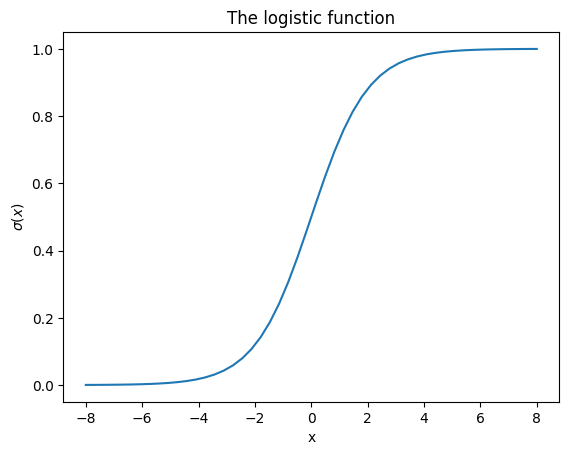

In [33]:
x = np.linspace(-8, 8)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))


plt.title("The logistic function")
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.plot(x, sigmoid_function(x))
plt.savefig("../figures/logreg_fig.png")

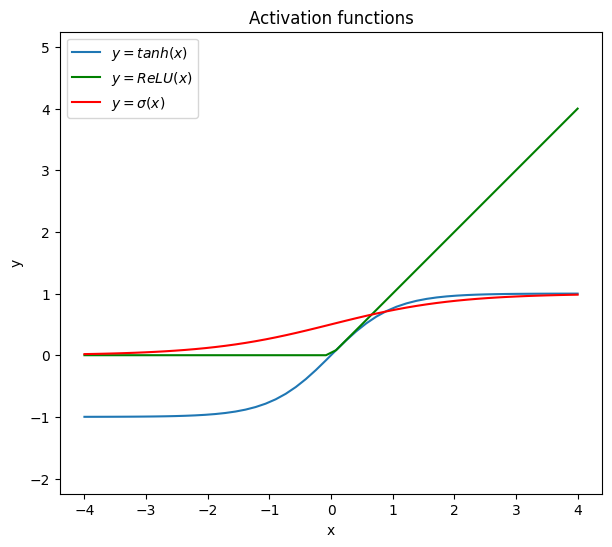

In [34]:
x = np.linspace(-4, 4)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return np.tanh(x)

plt.figure(figsize=(7,6))
plt.title("Activation functions")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, tanh(x), label="$y=tanh(x)$")
plt.plot(x, relu(x), label="$y=ReLU(x)$", color="green")
plt.plot(x, sigmoid_function(x), label="$y=\sigma(x)$", color="red")
plt.axis("equal")
plt.legend()
plt.savefig("../figures/activation_functions_fig.png")

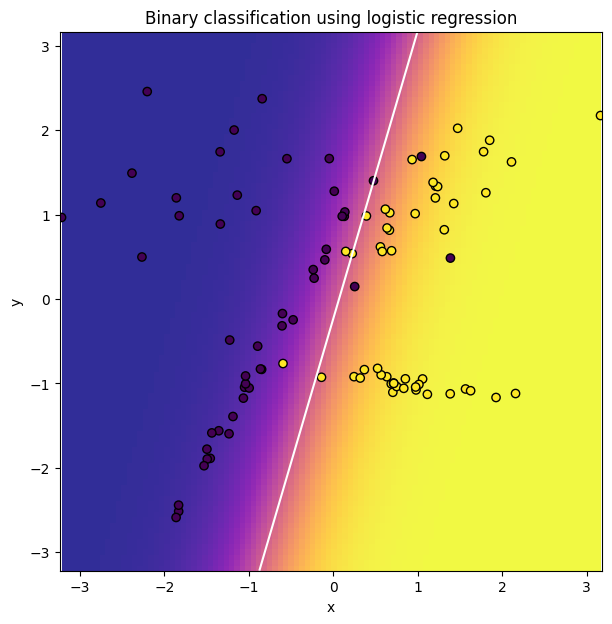

In [35]:
np.random.seed(420)

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2
)

plt.figure(figsize=(7, 7))
plt.axis("equal")

x_min, x_max = X[:, 0].min(axis=0), X[:, 0].max(axis=0)
y_min, y_max = X[:, 1].min(axis=0), X[:, 1].max(axis=0) 
n = 100

lower, upper = np.min([x_min, y_min]), np.max([x_max, y_max])

xx = np.linspace(lower, upper, n)
yy = np.linspace(lower, upper, n).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

model = LogisticRegression().fit(X, y)
probs = model.predict_proba(Xfull)

plt.imshow(probs[:, 1].reshape((n, n)), extent=(lower, upper, lower, upper), origin="lower", cmap="plasma", alpha=0.85)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
plt.contour(xx, yy, probs[:, 1].reshape(xx.shape), levels=[.5], colors="white")
plt.title("Binary classification using logistic regression")
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('../figures/two_class_lr_plot.png')
plt.show()

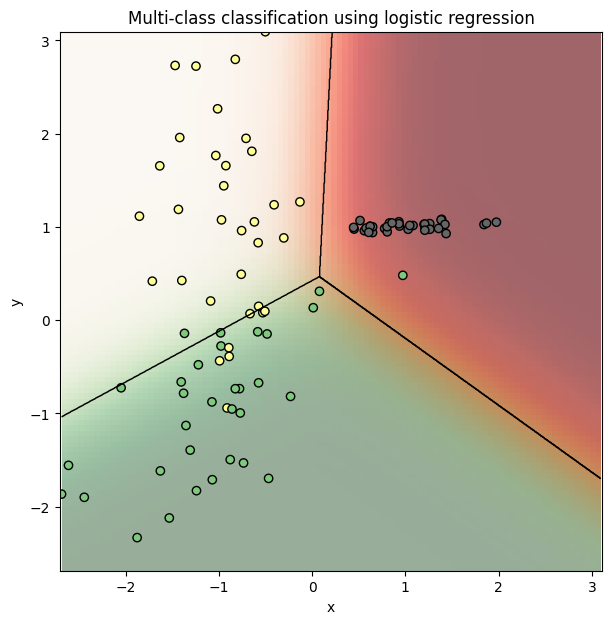

In [36]:
np.random.seed(420)

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3
)

plt.figure(figsize=(7, 7))
plt.axis("equal")

x_min, x_max = X[:, 0].min(axis=0), X[:, 0].max(axis=0)
y_min, y_max = X[:, 1].min(axis=0), X[:, 1].max(axis=0) 
n = 100

lower, upper = np.min([x_min, y_min]), np.max([x_max, y_max])

xx = np.linspace(lower, upper, n)
yy = np.linspace(lower, upper, n).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

model = LogisticRegression(multi_class='multinomial')
model.fit(X, y)
probs = model.predict_proba(Xfull)

plt.imshow(
    probs[:, 1].reshape((n, n)), extent=(lower, upper, lower, upper), origin="lower", cmap="Greys", alpha=1
)
plt.imshow(
    probs[:, 2].reshape((n, n)), extent=(lower, upper, lower, upper), origin="lower", cmap="Greens", alpha=1
)
plt.imshow(
    (1 - probs[:, 2].reshape((n, n)) - probs[:, 1].reshape((n, n))), 
    extent=(lower, upper, lower, upper), origin="lower", cmap="Reds", alpha=0.6
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent_r", edgecolor="black")


predicted_labels = np.argmax(probs, axis=1)
n=1000
xx = np.linspace(lower, upper, n)
yy = np.linspace(lower, upper, n).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
meshgrid_probs = model.predict_proba(Xfull)
decision_boundary = np.argmax(meshgrid_probs, axis=1)
plt.contour(xx, yy, decision_boundary.reshape(xx.shape), levels=[0.5, 1.5, 2.5], colors='black', linewidths=1)

plt.title("Multi-class classification using logistic regression")
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('../figures/multiclass_lr_plot.png')
plt.show()
